# JuliaでBit全探索を書く時にはdigitsを使うと便利。
> Julia言語でBit全探索を実装します。

- toc: true 
- badges: true
- comments: true
- categories: [AtCoder]
- image: images/chart-preview.png


# digitsについて

digits(a, base=b, pad=c)は、10進数の整数aをc桁のb進数に変換した配列を返します。


例えば,

In [14]:
n = 22
println(digits(n, base=2, pad=6))

[0, 1, 1, 0, 1, 0]


$22 = 10110_2$ なので、正しいですね！ 桁数が足りない場合は0で埋められます。

Juliaでは、これを利用して、Bit全探索を用意に実装できます。

(Bit全探索については、https://algo-logic.info/rec-bit-search/ がわかりやすいのでおすすめです)

具体的には以下のようなコードです。

In [15]:
N = 4
for i in 0:2^N - 1
    pettern = digits(i, base=2, pad=N)
    println(pettern)
end

[0, 0, 0, 0]
[1, 0, 0, 0]
[0, 1, 0, 0]
[1, 1, 0, 0]
[0, 0, 1, 0]
[1, 0, 1, 0]
[0, 1, 1, 0]
[1, 1, 1, 0]
[0, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 0, 1]
[1, 1, 0, 1]
[0, 0, 1, 1]
[1, 0, 1, 1]
[0, 1, 1, 1]
[1, 1, 1, 1]


あとはこの各パターンについて

`1 -> True`,
`0 -> False`

と見做して処理を行えば良いです。具体的に問題を解いてみます。

# 　部分和問題

部分和問題とは、
n 個の整数 $a_1,...,a_n$ からなる配列Aと,

整数 S が与えられた時、適切な部分集合を選んで、総和をSとすることができるかを判定する問題です。


例えば,

```julia
A = [1, 2, 4, 5]
S = 8
```

の時,


$A_1 + A_2 + A_3 = 8$ なので、適切な部分集合を選んで総和をSとすることができました。

nが小さい時は、bit全探索を用いることで実用的な速度で解くことができます。

この記事で最初に解説したように, digitsを用いて全てのパターンを列挙します。

In [20]:
N = 4
for i in 0:2^N - 1
    pettern = digits(i, base=2, pad=N)
    println(pettern)
end

[0, 0, 0, 0]
[1, 0, 0, 0]
[0, 1, 0, 0]
[1, 1, 0, 0]
[0, 0, 1, 0]
[1, 0, 1, 0]
[0, 1, 1, 0]
[1, 1, 1, 0]
[0, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 0, 1]
[1, 1, 0, 1]
[0, 0, 1, 1]
[1, 0, 1, 1]
[0, 1, 1, 1]
[1, 1, 1, 1]


ここで0を `false` (つまりそれを選択しない), 

1を`true`(それを選択する)とみなした時、

そのパターンを表す配列を $P$ とすると、選択した要素の和は, 


$$
dot(A, P) = (A_1 * P_1 + A_2 * P_2  + ... + A_N * P_N)
$$

なので、


$dot(A, P)$ と表すことができます。

したがって、部分和問題は次のようなコードで解けます。

とてもシンプルですね！

In [21]:
using LinearAlgebra

function solve(N, A, S)
    for i in 0:2^N - 1
        P = digits(i, base=2, pad=N)
        if dot(A, P) == S
            return "OK, P = $P"
        end
    end
    return "NO"
end

solve (generic function with 1 method)

In [27]:
N = 4
A = rand(1:10, N) 
S = rand(1:40)

@show N
@show A
@show S

solve(N, A, S)

N = 4
A = [9, 2, 2, 9]
S = 13


"OK, P = [1, 1, 1, 0]"

計算量は、内積に$O(N)$かかり、パターンの数が$2^N$個あることから、

$O(N2^N)$

です。

そのため、Nが大きくなると計算時間がすごいことになります。実験してみます。

In [28]:
using Plots; gr()
using BenchmarkTools

In [29]:
# 最悪の計算量が知りたいので、絶対に「"No"」になるようなケースについて調べます。
# Aは全て0, 和が1とします。

function benchmark(N)
    times = zeros(N)
    S = 1
    for i in 1:N
        A = zeros(Int, i)
        benchmark = @benchmark solve($i, $A, $S)
        times[i] = mean(benchmark.times)
    end
    return times
end

benchmark (generic function with 1 method)

In [30]:
result = benchmark(16)

16-element Array{Float64,1}:
    136.52074519956847
    270.3859683189655
    553.4468969072165
   1160.1675777777778
   2450.55804
   4967.185928571428
  10157.935066666667
  20637.5894
  43007.4263
  89277.9706
 181184.7634
 370513.8169
 785125.3387350535
      1.6068045593438405e6
      3.3274192804796803e6
      6.477057660621761e6

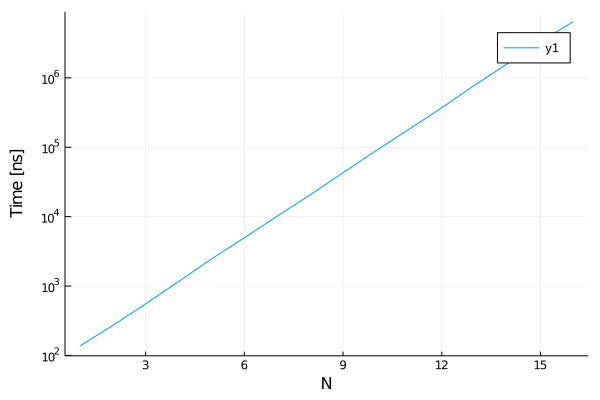

In [31]:
plot(result,  yaxis=:log)
xlabel!("N")
ylabel!("Time [ns]")

お手本のような指数関数ありがとうございます。Nが大きくなるにつれ計算量も爆発的に大きくなるので、使う時は気をつけましょう。